# Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor 

# Import Dataset

In [2]:
data = pd.read_csv('abalone.csv')
data

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


# Univariate Analysis

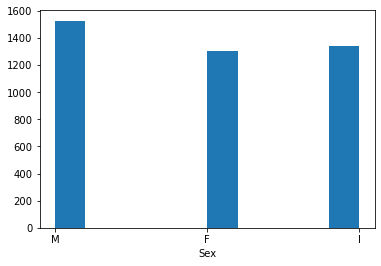

In [4]:
plt.hist(data['Sex']);
plt.xlabel('Sex');

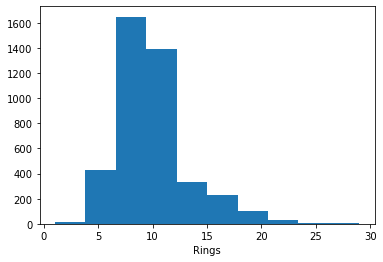

In [5]:
plt.hist(data['Rings']);
plt.xlabel('Rings');

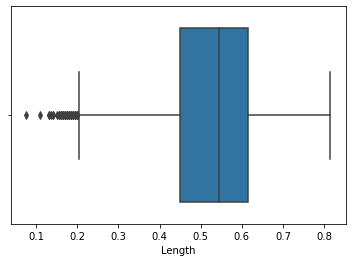

In [6]:
sns.boxplot(x=data['Length'])
plt.xlabel('Length');

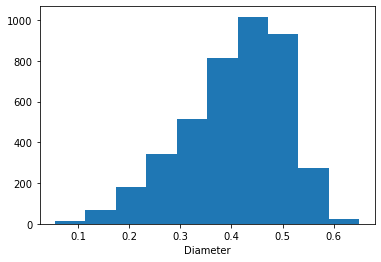

In [7]:
plt.hist(data['Diameter']);
plt.xlabel('Diameter');

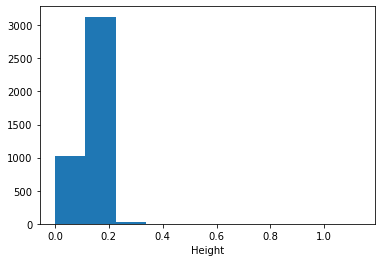

In [8]:
plt.hist(data['Height']);
plt.xlabel('Height');

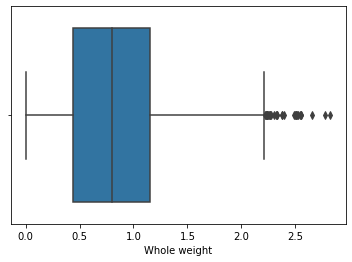

In [9]:
sns.boxplot(x=data['Whole weight'])
plt.xlabel('Whole weight');

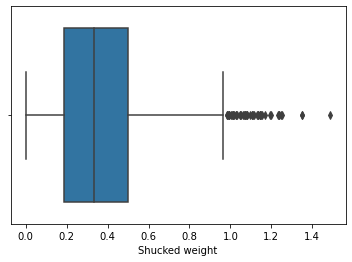

In [10]:
sns.boxplot(x=data['Shucked weight'])
plt.xlabel('Shucked weight');

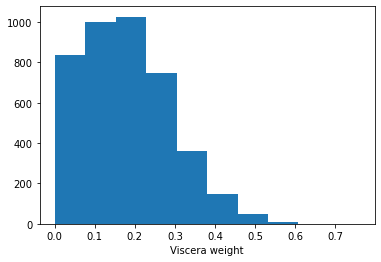

In [11]:
plt.hist(data['Viscera weight']);
plt.xlabel('Viscera weight');

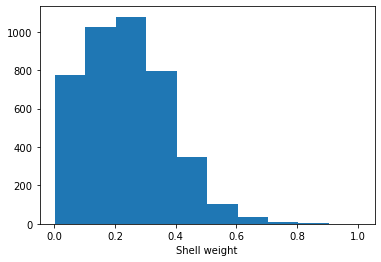

In [12]:
plt.hist(data['Shell weight']);
plt.xlabel('Shell weight');

# Bivariate Analysis

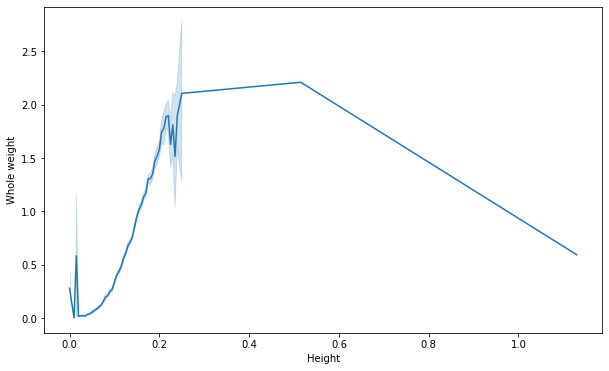

In [13]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=data["Height"], y=data["Whole weight"]);
plt.xlabel('Height');
plt.ylabel('Whole weight');

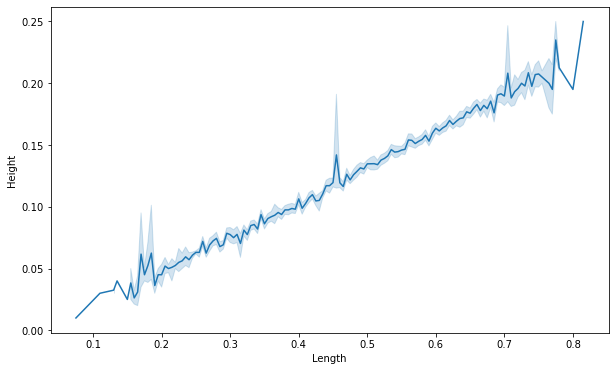

In [14]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=data["Length"], y=data["Height"]);
plt.xlabel('Length');
plt.ylabel('Height');

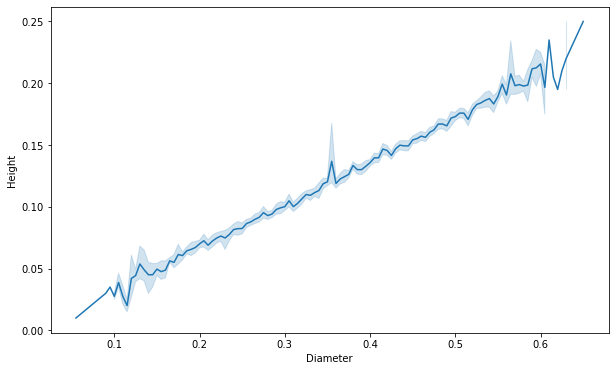

In [15]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=data["Diameter"], y=data["Height"]);
plt.xlabel('Diameter');
plt.ylabel('Height');

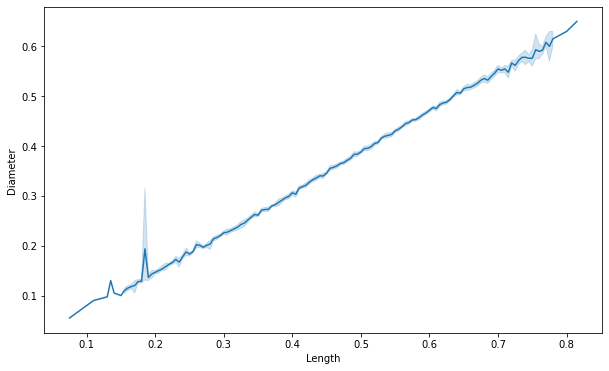

In [16]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=data["Length"], y=data["Diameter"]);
plt.xlabel('Length');
plt.ylabel('Diameter');

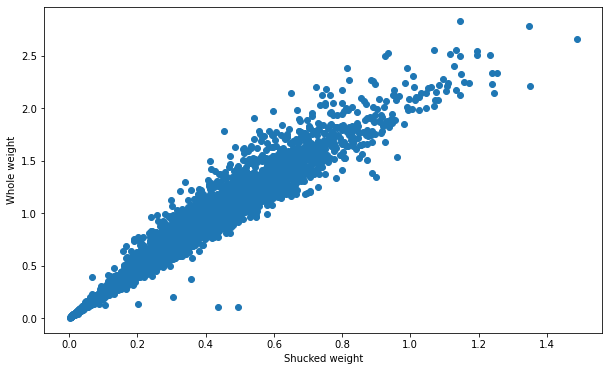

In [17]:
plt.figure(figsize=(10, 6))
plt.scatter(x=data["Shucked weight"], y=data["Whole weight"]);
plt.xlabel('Shucked weight');
plt.ylabel('Whole weight');

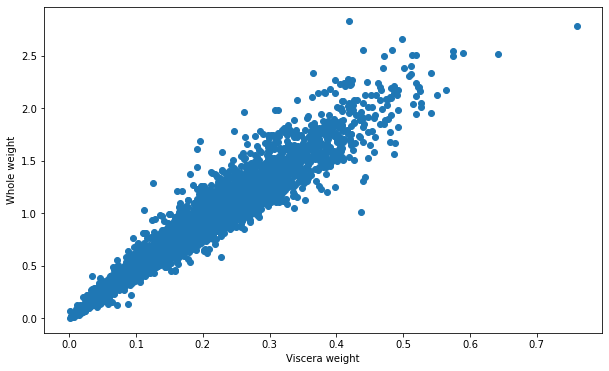

In [18]:
plt.figure(figsize=(10, 6))
plt.scatter(x=data["Viscera weight"], y=data["Whole weight"]);
plt.xlabel('Viscera weight');
plt.ylabel('Whole weight');

# Multi-variate Analysis

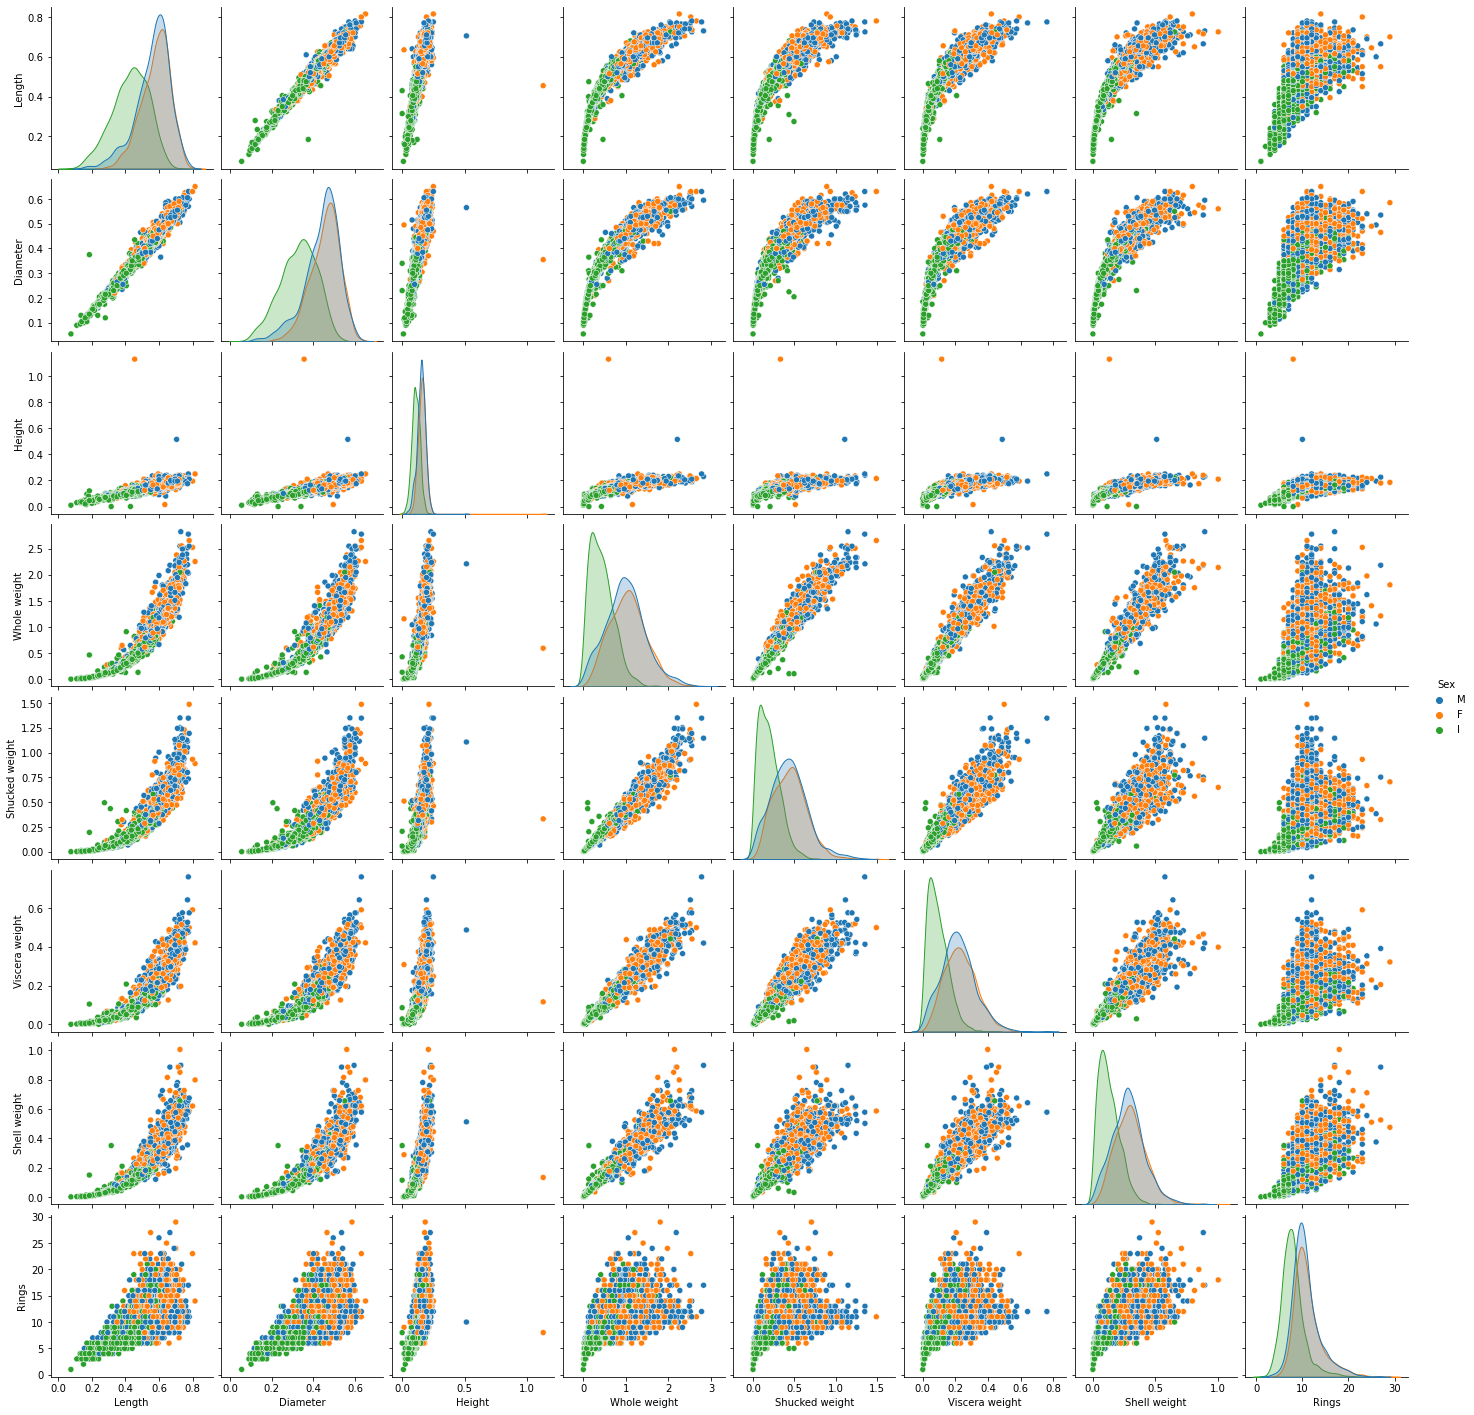

In [19]:
sns.pairplot(data, hue='Sex');

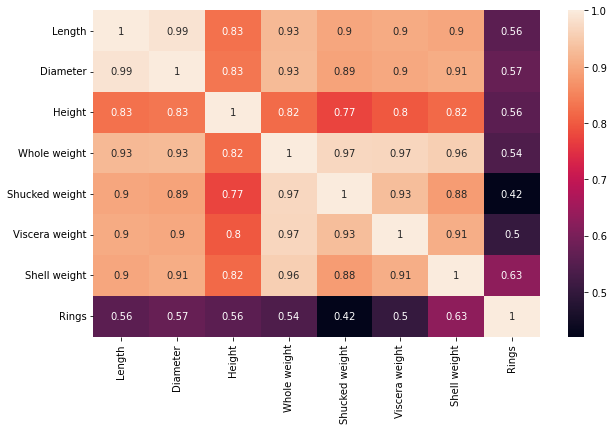

In [20]:
plt.figure(figsize=(10, 6));
sns.heatmap(data.corr(), annot=True);

# Descriptive Statistics

In [21]:
data.describe()

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


# Handling Missing Values

In [22]:
data.isna().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

# Outlier Handling

In [23]:
numeric_cols = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']

def boxplots(cols):
    fig, axes = plt.subplots(4, 2, figsize=(15, 20))

    t=0
    for i in range(4):
        for j in range(2):
            sns.boxplot(ax=axes[i][j], data=data, x=cols[t])
            t+=1

    plt.show()

In [24]:
def Flooring_outlier(col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    data[col]=np.where(data[col]>upper_whisker,upper_whisker,np.where(data[col]<lower_whisker,lower_whisker,data[col]))

Before Outliers Handling


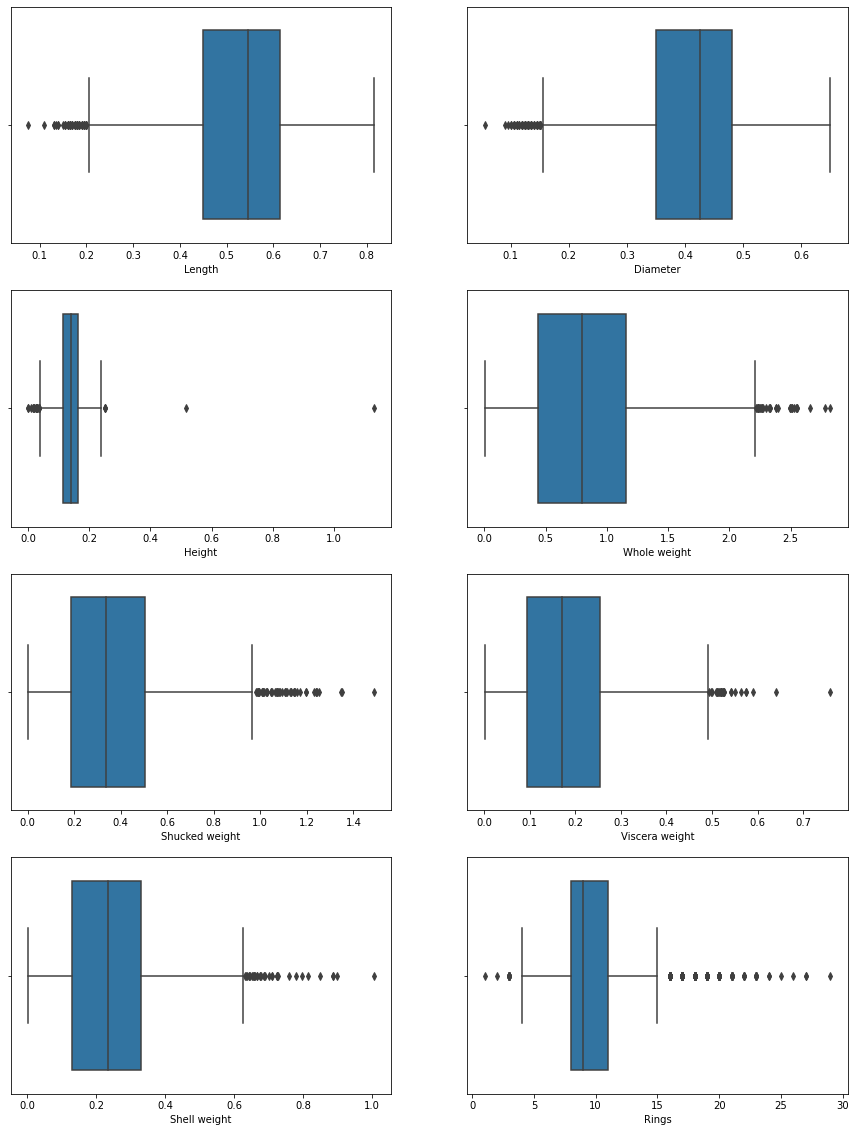




After Outliers Handling


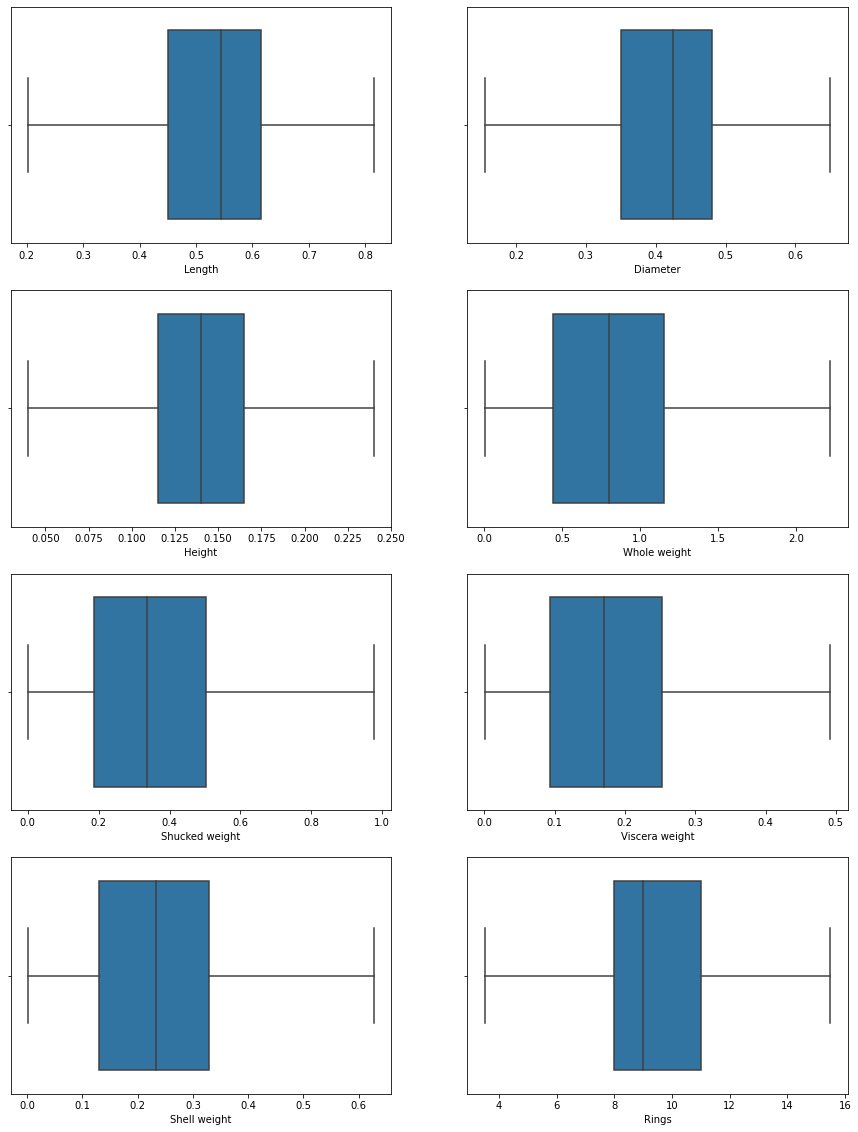

In [25]:
print('Before Outliers Handling')
print('='*100)
boxplots(numeric_cols)
for col in numeric_cols:
    Flooring_outlier(col)
print('\n\n\nAfter Outliers Handling')
print('='*100)
boxplots(numeric_cols)

# Encode Categorical Columns

In [26]:
data = pd.get_dummies(data, columns = ['Sex'])
data

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings,Sex_F,Sex_I,Sex_M
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15.0,0,0,1
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7.0,0,0,1
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9.0,1,0,0
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10.0,0,0,1
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7.0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
4172,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11.0,1,0,0
4173,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10.0,0,0,1
4174,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9.0,0,0,1
4175,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10.0,1,0,0


# Split Data into Dependent & Independent Columns

In [27]:
Y = data[['Rings']]
X = data.drop(['Rings'], axis=1)

# Scale the independent Variables

In [28]:
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.58311728, -0.44088378, -1.15809314, ..., -0.67483383,
        -0.68801788,  1.31667716],
       [-1.46569411, -1.45976205, -1.28875125, ..., -0.67483383,
        -0.68801788,  1.31667716],
       [ 0.04729474,  0.11949927, -0.1128283 , ...,  1.48184628,
        -0.68801788, -0.75948762],
       ...,
       [ 0.63567929,  0.67988232,  1.71638519, ..., -0.67483383,
        -0.68801788,  1.31667716],
       [ 0.84581663,  0.78177015,  0.27914602, ...,  1.48184628,
        -0.68801788, -0.75948762],
       [ 1.56028358,  1.49498494,  1.45506898, ..., -0.67483383,
        -0.68801788,  1.31667716]])

# Train Test Split

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((3341, 10), (836, 10), (3341, 1), (836, 1))

# Model Training & Testing

In [30]:
model = LinearRegression()
model.fit(X_train, Y_train)
model.score(X_train, Y_train), model.score(X_test, Y_test)

(0.5743537797259437, 0.574066914479568)

In [31]:
model = DecisionTreeRegressor(max_depth=15, max_leaf_nodes=40)
model.fit(X_train, Y_train)
model.score(X_train, Y_train), model.score(X_test, Y_test)

(0.6299341126842184, 0.5533377990647702)